In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers, regularizers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import tensorflow as tf
from sklearn.model_selection import train_test_split

/tmp/ipykernel_16234/3128693050.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2025-11-12 17:52:41.609129: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-12 17:52:41.677646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-12 17:52:41.677711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin

In [2]:
import os
BASE_DIR = 'coe379l-fa25/datasets/unit03/Project2'
DAMAGE_DIR = os.path.join(BASE_DIR, 'damage')
NO_DAMAGE_DIR = os.path.join(BASE_DIR, 'no_damage')
damage_images = os.listdir('coe379l-fa25/datasets/unit03/Project2/damage')
no_damage_images = os.listdir('coe379l-fa25/datasets/unit03/Project2/no_damage')

In [3]:
print(f"Number of damaged building images: {len(damage_images)}")
print(f"Number of non-damaged building images: {len(no_damage_images)}")
print(f"Total images: {len(damage_images) + len(no_damage_images)}")

Number of damaged building images: 14170
Number of non-damaged building images: 7152
Total images: 21322


In [4]:
total_images = len(damage_images) + len(no_damage_images)
damage_percentage = len(damage_images) / total_images * 100
print(f"\nClass balance: {damage_percentage:.1f}% damaged, {100-damage_percentage:.1f}% not damaged")


Class balance: 66.5% damaged, 33.5% not damaged


In [5]:
sample_damage = os.path.join(DAMAGE_DIR, damage_images[0])
# Code below was generated by AI
img = Image.open(sample_damage)
print(f"\nSample damaged image:")
print(f"  Size: {img.size}")
print(f"  Mode: {img.mode}")
print(f"  Format: {img.format}")


Sample damaged image:
  Size: (128, 128)
  Mode: RGB
  Format: JPEG


In [6]:
# Code below was generated by AI
sample_no_damage = os.path.join(NO_DAMAGE_DIR, no_damage_images[0])
img = Image.open(sample_no_damage)
print(f"\nSample non-damaged image:")
print(f"  Size: {img.size}")
print(f"  Mode: {img.mode}")
print(f"  Format: {img.format}")


Sample non-damaged image:
  Size: (128, 128)
  Mode: RGB
  Format: JPEG


In [7]:
print("\nChecking image dimensions across dataset (sample of 20 images)...")
widths = []
heights = []

for img_name in damage_images[:10]:
    img = Image.open(os.path.join(DAMAGE_DIR, img_name))
    widths.append(img.size[0])
    heights.append(img.size[1])

for img_name in no_damage_images[:10]:
    img = Image.open(os.path.join(NO_DAMAGE_DIR, img_name))
    widths.append(img.size[0])
    heights.append(img.size[1])

print(f"Width range: {min(widths)} to {max(widths)}")
print(f"Height range: {min(heights)} to {max(heights)}")


Checking image dimensions across dataset (sample of 20 images)...
Width range: 128 to 128
Height range: 128 to 128


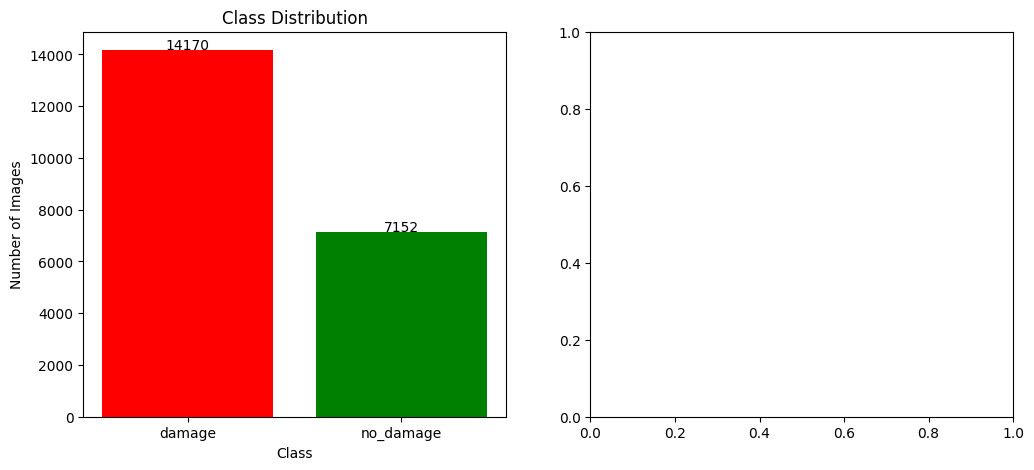

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
categories = ['damage', 'no_damage']
counts = [len(damage_images), len(no_damage_images)]

ax[0].bar(categories, counts, color=['red', 'green'])
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Images')
ax[0].set_title('Class Distribution')
for i, v in enumerate(counts):
    ax[0].text(i, v + 10, str(v), ha='center')


In [9]:
damage_paths = [os.path.join(DAMAGE_DIR, img) for img in damage_images]
no_damage_paths = [os.path.join(NO_DAMAGE_DIR, img) for img in no_damage_images]

In [10]:
all_paths = damage_paths + no_damage_paths
all_labels = ['damage'] * len(damage_paths) + ['no_damage'] * len(no_damage_paths)

In [11]:
data_dict = {'filepath': all_paths, 'label': all_labels}
df = pd.DataFrame(data_dict)

In [12]:
train_df, temp_df = train_test_split(
    df, 
    test_size=0.3, 
    random_state=1, 
    stratify=df['label']
)

In [13]:
val_df, test_df = train_test_split(
    temp_df, 
    test_size=0.5, 
    random_state=1, 
    stratify=temp_df['label']
)

print(f"Total images: {len(df)}")
print(f"Training set: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validation set: {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")
print(f"Test set: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(train_df['label'].value_counts())
print(f"\nValidation set class distribution:")
print(val_df['label'].value_counts())
print(f"\nTest set class distribution:")
print(test_df['label'].value_counts())

Total images: 21322
Training set: 14925 (70.0%)
Validation set: 3198 (15.0%)
Test set: 3199 (15.0%)

Training set class distribution:
label
damage       9919
no_damage    5006
Name: count, dtype: int64

Validation set class distribution:
label
damage       2125
no_damage    1073
Name: count, dtype: int64

Test set class distribution:
label
damage       2126
no_damage    1073
Name: count, dtype: int64


In [14]:
IMG_SIZE = (128, 128)  # Resize all images to this size
BATCH_SIZE = 32

print(f"Image size: {IMG_SIZE}")
print(f"Batch size: {BATCH_SIZE}")

Image size: (128, 128)
Batch size: 32


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

Found 14925 validated image filenames belonging to 2 classes.
Found 3198 validated image filenames belonging to 2 classes.
Found 3199 validated image filenames belonging to 2 classes.

Training generator: 14925 images
Validation generator: 3198 images
Test generator: 3199 images
Class mapping: {'damage': 0, 'no_damage': 1}

Visualizing one batch from training generator...


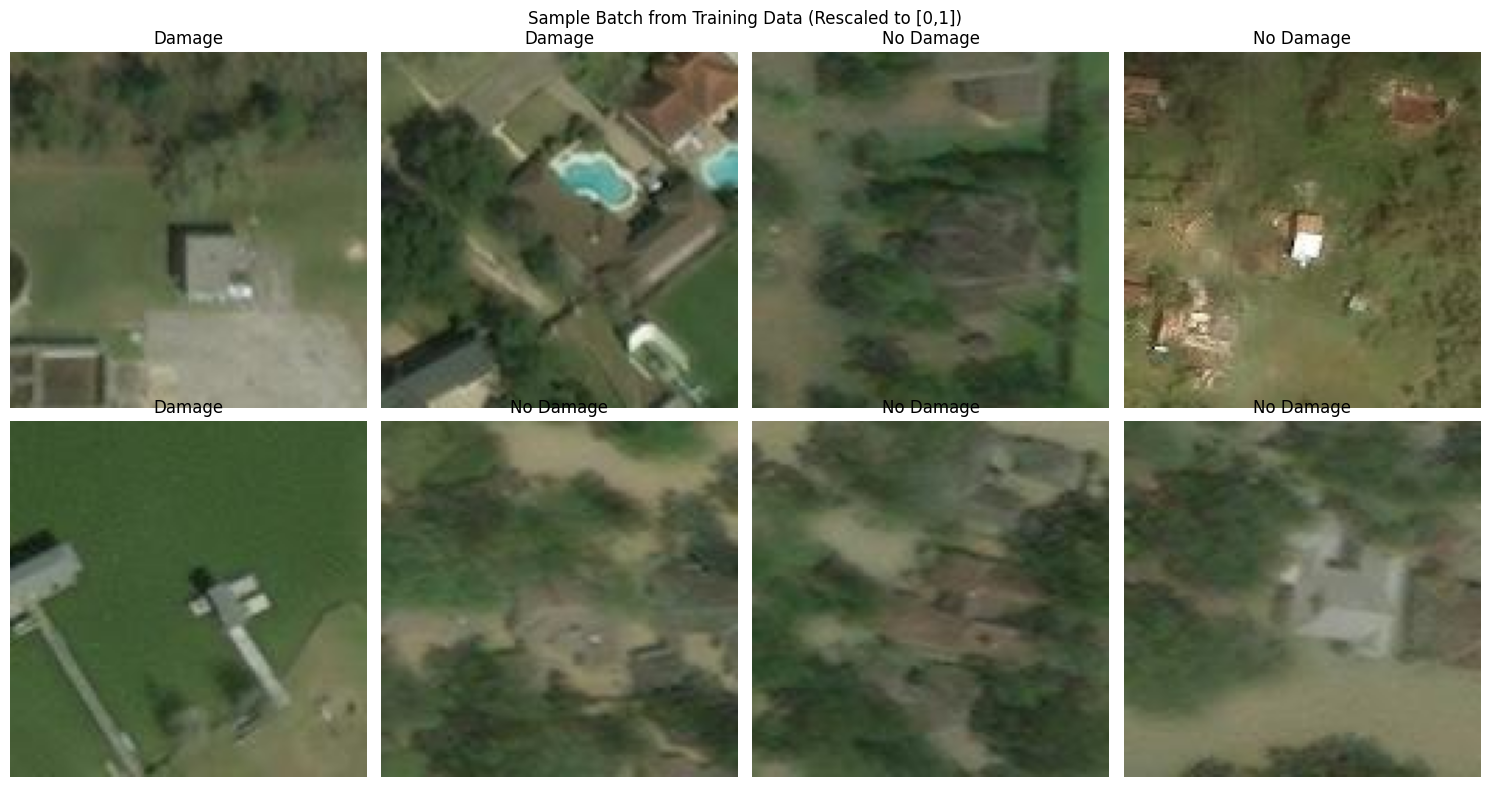

In [16]:
# CODE BELOW GENERATED BY AI
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,
    seed=1
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print(f"\nTraining generator: {train_generator.n} images")
print(f"Validation generator: {val_generator.n} images")
print(f"Test generator: {test_generator.n} images")
print(f"Class mapping: {train_generator.class_indices}")

# Visualize one batch
print("\nVisualizing one batch from training generator...")
batch_images, batch_labels = next(train_generator)

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i in range(8):
    axes[i].imshow(batch_images[i])
    label_text = 'Damage' if batch_labels[i] == 1 else 'No Damage'
    axes[i].set_title(f'{label_text}')
    axes[i].axis('off')

plt.suptitle('Sample Batch from Training Data (Rescaled to [0,1])')
plt.tight_layout()
plt.show()


In [17]:
dense_model = keras.Sequential(name="dense_ann")

dense_model.add(layers.Flatten(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))

dense_model.add(layers.Dense(1024, activation="relu"))
dense_model.add(layers.BatchNormalization())
dense_model.add(layers.Dropout(0.5))

dense_model.add(layers.Dense(512, activation="relu"))
dense_model.add(layers.BatchNormalization())
dense_model.add(layers.Dropout(0.4))

dense_model.add(layers.Dense(128, activation="relu"))
dense_model.add(layers.BatchNormalization())
dense_model.add(layers.Dropout(0.3))

dense_model.add(layers.Dense(1, activation="sigmoid"))

dense_model.compile(
    optimizer=keras.optimizers.Adam(1e-4),  # smaller LR helps stability
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

dense_model.summary()

Model: "dense_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 1024)              50332672  
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                        

In [18]:
early_dense = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history_dense = dense_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_dense]
)

dense_eval = dense_model.evaluate(test_generator, verbose=0)
print("Dense ANN – Test Loss/Accuracy:", dense_eval)

Epoch 1/30
467/467 [==============================] - 158s 336ms/step - loss: 0.6933 - accuracy: 0.6498 - val_loss: 0.5248 - val_accuracy: 0.7430
Epoch 2/30
467/467 [==============================] - 155s 331ms/step - loss: 0.5745 - accuracy: 0.7238 - val_loss: 0.5223 - val_accuracy: 0.7452
Epoch 3/30
467/467 [==============================] - 155s 332ms/step - loss: 0.5385 - accuracy: 0.7504 - val_loss: 0.5739 - val_accuracy: 0.7173
Epoch 4/30
467/467 [==============================] - 153s 327ms/step - loss: 0.5307 - accuracy: 0.7528 - val_loss: 0.5180 - val_accuracy: 0.7639
Epoch 5/30
467/467 [==============================] - 156s 335ms/step - loss: 0.5173 - accuracy: 0.7595 - val_loss: 0.5341 - val_accuracy: 0.7351
Epoch 6/30
467/467 [==============================] - 157s 335ms/step - loss: 0.5012 - accuracy: 0.7725 - val_loss: 0.6026 - val_accuracy: 0.7445
Epoch 7/30
467/467 [==============================] - 157s 335ms/step - loss: 0.4977 - accuracy: 0.7694 - val_loss: 0.7311 -

In [21]:
lenet_model = keras.Sequential(name="lenet5")

lenet_model.add(layers.Conv2D(
    6, (5,5),
    activation="relu",
    padding="same",
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    kernel_regularizer=regularizers.l2(1e-4)
))
lenet_model.add(layers.AveragePooling2D())

lenet_model.add(layers.Conv2D(
    16, (5,5),
    activation="relu",
    kernel_regularizer=regularizers.l2(1e-4)
))
lenet_model.add(layers.AveragePooling2D())
lenet_model.add(layers.Dropout(0.3))

lenet_model.add(layers.Flatten())
lenet_model.add(layers.Dense(120, activation="relu"))
lenet_model.add(layers.BatchNormalization())
lenet_model.add(layers.Dropout(0.4))

lenet_model.add(layers.Dense(84, activation="relu"))
lenet_model.add(layers.BatchNormalization())
lenet_model.add(layers.Dropout(0.3))

lenet_model.add(layers.Dense(1, activation="sigmoid"))

lenet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

lenet_model.summary()

Model: "lenet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 6)       456       
                                                                 
 average_pooling2d (Average  (None, 64, 64, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 30, 30, 16)        0         
 gePooling2D)                                                    
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 16)        0         
                                                                 
 flatten_2 (Flatten)         (None, 14400)             0    

In [22]:
early_lenet = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history_lenet = lenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_lenet]
)

lenet_eval = lenet_model.evaluate(test_generator, verbose=0)
print("LeNet-5 – Test Loss/Accuracy:", lenet_eval)

Epoch 1/20
467/467 [==============================] - 57s 119ms/step - loss: 0.5677 - accuracy: 0.7429 - val_loss: 0.5019 - val_accuracy: 0.7558
Epoch 2/20
467/467 [==============================] - 55s 117ms/step - loss: 0.3554 - accuracy: 0.8674 - val_loss: 0.5984 - val_accuracy: 0.7545
Epoch 3/20
467/467 [==============================] - 55s 117ms/step - loss: 0.2742 - accuracy: 0.8992 - val_loss: 0.2072 - val_accuracy: 0.9206
Epoch 4/20
467/467 [==============================] - 54s 116ms/step - loss: 0.2178 - accuracy: 0.9166 - val_loss: 0.2019 - val_accuracy: 0.9184
Epoch 5/20
467/467 [==============================] - 54s 116ms/step - loss: 0.1899 - accuracy: 0.9286 - val_loss: 0.1768 - val_accuracy: 0.9328
Epoch 6/20
467/467 [==============================] - 54s 115ms/step - loss: 0.1636 - accuracy: 0.9392 - val_loss: 0.1580 - val_accuracy: 0.9356
Epoch 7/20
467/467 [==============================] - 56s 119ms/step - loss: 0.1455 - accuracy: 0.9458 - val_loss: 0.2412 - val_ac

In [26]:
alt_lenet_model = models.Sequential(name="alt_lenet5_paper")

# input layer
alt_lenet_model.add(layers.Input(shape=IMG_SIZE + (3,)))

# block 1
alt_lenet_model.add(layers.Conv2D(32, (3,3), activation="relu", padding="valid"))
alt_lenet_model.add(layers.MaxPooling2D((2,2)))

# block 2
alt_lenet_model.add(layers.Conv2D(64, (3,3), activation="relu", padding="valid"))
alt_lenet_model.add(layers.MaxPooling2D((2,2)))

# block 3
alt_lenet_model.add(layers.Conv2D(128, (3,3), activation="relu", padding="valid"))
alt_lenet_model.add(layers.MaxPooling2D((2,2)))

# block 4
alt_lenet_model.add(layers.Conv2D(128, (3,3), activation="relu", padding="valid"))
alt_lenet_model.add(layers.MaxPooling2D((2,2)))

# flatten
alt_lenet_model.add(layers.Flatten())
alt_lenet_model.add(layers.Dropout(0.5))
alt_lenet_model.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-4)))
alt_lenet_model.add(layers.Dense(1, activation="sigmoid"))

# compile
alt_lenet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

alt_lenet_model.summary()

Model: "alt_lenet5_paper"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 128)  

In [27]:
early_alt = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

history_alt = alt_lenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_alt]
)

alt_eval = alt_lenet_model.evaluate(test_generator, verbose=0)
print("Alt-LeNet-5 – Test Loss/Accuracy:", alt_eval)

Epoch 1/20
467/467 [==============================] - 99s 209ms/step - loss: 0.4617 - accuracy: 0.8234 - val_loss: 0.3065 - val_accuracy: 0.9165
Epoch 2/20
467/467 [==============================] - 97s 207ms/step - loss: 0.2506 - accuracy: 0.9217 - val_loss: 0.1903 - val_accuracy: 0.9415
Epoch 3/20
467/467 [==============================] - 97s 208ms/step - loss: 0.1805 - accuracy: 0.9440 - val_loss: 0.2192 - val_accuracy: 0.9346
Epoch 4/20
467/467 [==============================] - 97s 208ms/step - loss: 0.1491 - accuracy: 0.9545 - val_loss: 0.1295 - val_accuracy: 0.9609
Epoch 5/20
467/467 [==============================] - 97s 207ms/step - loss: 0.1319 - accuracy: 0.9601 - val_loss: 0.1205 - val_accuracy: 0.9622
Epoch 6/20
467/467 [==============================] - 96s 206ms/step - loss: 0.1214 - accuracy: 0.9617 - val_loss: 0.1300 - val_accuracy: 0.9568
Epoch 7/20
467/467 [==============================] - 95s 204ms/step - loss: 0.1112 - accuracy: 0.9652 - val_loss: 0.1031 - val_ac

In [28]:
# CELL BELOW WAS GENERATED BY AI

# --- Gather results from your existing variables ---
# Expecting: dense_eval, lenet_eval, alt_eval are [loss, acc]
# and history_dense, history_lenet, history_alt exist (from model.fit)
candidates = []

def add_candidate(name, eval_pair, history):
    if eval_pair is None: 
        return
    test_loss, test_acc = float(eval_pair[0]), float(eval_pair[1])
    # best val epoch metric to prefer less overfit
    best_val_loss = min(history.history["val_loss"]) if history and "val_loss" in history.history else float("inf")
    best_val_acc  = max(history.history["val_accuracy"]) if history and "val_accuracy" in history.history else 0.0
    candidates.append({
        "name": name,
        "test_acc": test_acc,
        "test_loss": test_loss,
        "best_val_loss": best_val_loss,
        "best_val_acc": best_val_acc
    })

# Safely add each if defined
try: add_candidate("Dense ANN", dense_eval, history_dense)
except: pass
try: add_candidate("LeNet-5",  lenet_eval, history_lenet)
except: pass
try: add_candidate("Alt-LeNet-5", alt_eval, history_alt)
except: pass

# Sort by: highest test_acc, then lowest best_val_loss (tie-breaker), then highest best_val_acc
candidates_sorted = sorted(
    candidates,
    key=lambda d: (d["test_acc"], -d["best_val_loss"], d["best_val_acc"]),
    reverse=True
)

print("Model ranking:")
for i, c in enumerate(candidates_sorted, 1):
    print(f"{i}. {c['name']}: test_acc={c['test_acc']:.4f}, best_val_loss={c['best_val_loss']:.4f}, best_val_acc={c['best_val_acc']:.4f}")

best_name = candidates_sorted[0]["name"]
print("\nSelected best model for deployment:", best_name)

# Get the actual model object by name
name_to_model = {}
try: name_to_model["Dense ANN"]   = dense_model
except: pass
try: name_to_model["LeNet-5"]     = lenet_model
except: pass
# You may have used alt_model or alt_lenet_model; grab whichever exists
try: name_to_model["Alt-LeNet-5"] = alt_model
except: 
    try: name_to_model["Alt-LeNet-5"] = alt_lenet_model
    except: pass

best_model = name_to_model[best_name]


Model ranking:
1. Alt-LeNet-5: test_acc=0.9778, best_val_loss=0.0630, best_val_acc=0.9812
2. LeNet-5: test_acc=0.9412, best_val_loss=0.1385, best_val_acc=0.9490
3. Dense ANN: test_acc=0.7624, best_val_loss=0.5180, best_val_acc=0.7639

Selected best model for deployment: Alt-LeNet-5


In [29]:
import json, os
from pathlib import Path

# Infer image size the generators used (safer than hardcoding)
try:
    H, W, C = train_generator.image_shape
except:
    # Fallback: if not available, use your known IMG_SIZE
    H, W = IMG_SIZE
    C = 3

# Build class_names ordered by the generator's class_indices (0→1)
try:
    idx_to_name = {v:k for k,v in train_generator.class_indices.items()}
    class_names = [idx_to_name[i] for i in sorted(idx_to_name.keys())]
except:
    class_names = ["damage", "no_damage"]  # fallback; adjust if your labels differ

# Ensure the two labels exactly match the grader spec
# If your labels are reversed, you can still return "damage"/"no_damage" in the server code.
# Here we just record what training used.
print("Training class_names (by index):", class_names)

out_dir = Path("artifacts")
out_dir.mkdir(parents=True, exist_ok=True)

# Save model in Keras format
model_path = out_dir / "best_model.keras"
best_model.save(model_path)
print("Saved model to:", model_path.resolve())

# Save a small JSON summary used by GET /summary
summary = {
    "best_model_name": best_model.name if hasattr(best_model, "name") else "unknown",
    "img_size": [H, W],                 # server will resize to this
    "channels": C,
    "class_names": class_names,         # index 0 → class_names[0], index 1 → class_names[1]
    "framework": "tensorflow-keras"
}
with open(out_dir / "model_summary.json", "w") as f:
    json.dump(summary, f, indent=2)
print("Wrote:", (out_dir / "model_summary.json").resolve())


Training class_names (by index): ['damage', 'no_damage']
Saved model to: /code/hw/artifacts/best_model.keras
Wrote: /code/hw/artifacts/model_summary.json
